In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Read in data**

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')

In [3]:
df.columns.values

array(['iso_code', 'continent', 'location', 'date', 'total_cases',
       'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate',
       'icu_patients', 'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units',
       'total_vaccinations', 'people_vaccinated',
       'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_

In [4]:
most_recent_date = df.iloc[-1]['date']
most_recent_date

'2021-03-27'

### Countries with the most cases

In [5]:
total_cases = df[['date', 'location', 'total_cases', 'total_deaths']]
total_cases = total_cases.loc[total_cases['date'] == most_recent_date]
total_cases = total_cases.sort_values(by='total_cases', ascending=False)
total_cases = total_cases.drop(total_cases.index[[0, 1, 4, 5, 6]]) # not countries

most_affected_countries = total_cases[1:11]
most_affected_countries

,date,location,total_cases,total_deaths
74128,2021-03-27,United States,30218683.0,548828.0
10367,2021-03-27,Brazil,12490362.0,310550.0
32299,2021-03-27,India,11971624.0,161552.0
25809,2021-03-27,France,4569164.0,94623.0
57971,2021-03-27,Russia,4460348.0,95792.0
73697,2021-03-27,United Kingdom,4343066.0,126813.0
806,2021-03-27,Africa,4176092.0,111730.0
35184,2021-03-27,Italy,3512453.0,107636.0
66126,2021-03-27,Spain,3255324.0,75010.0
72025,2021-03-27,Turkey,3179115.0,30923.0


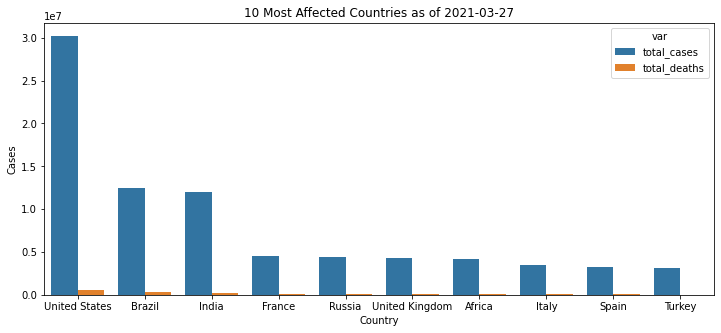

In [6]:
tidy = pd.melt(most_affected_countries, id_vars = ['location'],  value_vars=['total_cases', 'total_deaths'], 
               var_name='var', value_name='Cases')
plt.figure(figsize=(12, 5))
sns.barplot(x="location", hue="var", y="Cases", data=tidy)
plt.title(f'10 Most Affected Countries as of {most_recent_date}')
plt.xlabel('Country')
plt.show()

### New cases over the past two months

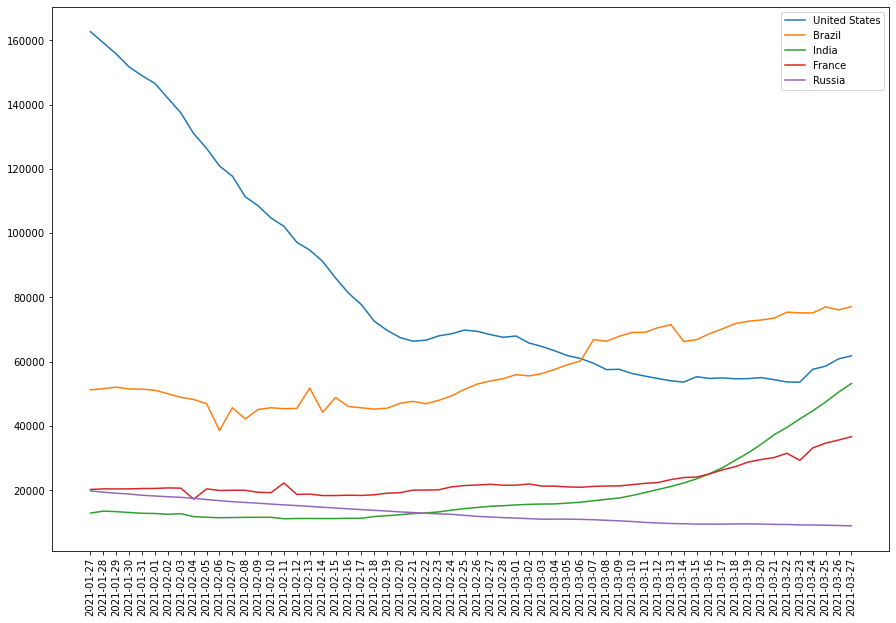

In [7]:
countries = most_affected_countries['location'].values[:5]

plt.figure(figsize=(15, 10))

for country in countries:
    location = df.loc[(df['location'] == country)].iloc[-60:]
    plt.plot(location['date'], location['new_cases_smoothed'], label=country)

plt.xticks(rotation=90)
plt.legend(loc="upper right")
plt.show()

### Effect of vaccines in the United States

### Countries with the highest testing rate

In [8]:
total_tests = df.groupby('location')['new_tests'].sum().values
population = df.groupby('location')['population'].nth(-1)
testing_rate = (total_tests/population).sort_values(ascending = False)[:10]

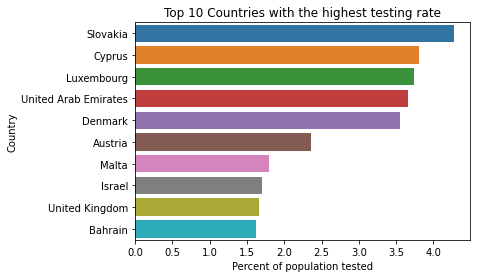

In [9]:
sns.barplot(y = testing_rate.index, x = testing_rate.values, orient = "horizontal")
plt.title('Top 10 Countries with the highest testing rate')
plt.xlabel('Percent of population tested')
plt.ylabel('Country')
plt.show()